In [14]:
import sys
sys.path.append('..')
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
from random import shuffle
import sklearn.tree
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from utils import calc_accuracy
from scipy import stats
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.svm import SVC


In [15]:
#import the data into test and train data for the wine dataset
test_data = np.array(np.genfromtxt('C:\\Users\\mukan\\Documents\\GitHub\\Ml-Project\\DATA\\winequality-red-test.csv', delimiter=",",  skip_header=1))
train_data = np.array(np.genfromtxt('C:\\Users\\mukan\\Documents\\GitHub\\Ml-Project\\DATA\\winequality-red-train.csv', delimiter=",",  skip_header=1))
print(train_data.shape)
print(train_data)
print()
print(test_data.shape)
print(test_data)

(1279, 13)
[[3.410e+02 1.060e+01 4.200e-01 ... 8.700e-01 1.130e+01 6.000e+00]
 [1.372e+03 8.700e+00 7.800e-01 ... 1.170e+00 9.200e+00 5.000e+00]
 [4.680e+02 1.140e+01 3.600e-01 ... 6.200e-01 9.200e+00 6.000e+00]
 ...
 [1.090e+02 8.100e+00 7.850e-01 ... 6.900e-01 9.300e+00 5.000e+00]
 [1.160e+02 8.300e+00 5.400e-01 ... 6.100e-01 1.000e+01 6.000e+00]
 [2.930e+02 6.900e+00 3.600e-01 ... 6.000e-01 1.010e+01 6.000e+00]]

(710, 13)
[[0.000e+00 7.400e+00 7.000e-01 ... 5.600e-01 9.400e+00 5.000e+00]
 [2.000e+00 7.800e+00 7.600e-01 ... 6.500e-01 9.800e+00 5.000e+00]
 [4.000e+00 7.400e+00 7.000e-01 ... 5.600e-01 9.400e+00 5.000e+00]
 ...
 [1.590e+03 6.300e+00 5.500e-01 ... 8.200e-01 1.160e+01 6.000e+00]
 [1.591e+03 5.400e+00 7.400e-01 ... 5.600e-01 1.160e+01 6.000e+00]
 [1.598e+03 6.000e+00 3.100e-01 ... 6.600e-01 1.100e+01 6.000e+00]]


In [1]:
#training of the DecisionTreeClassifier
train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]

train_loss =[]
val_loss = []
for i in range_max_depth:
    classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=i)

    classificationTree.fit(X_train, Y_train)
    #Z_train = classificationTree.predict(X_train)
    Z_train_loss = classificationTree.predict_proba(X_train)
    loss_train = log_loss(Y_train, Z_train_loss)
    train_loss.append(loss_train)

    #Z_val = classificationTree.predict(X_val)
    Z_val_loss = classificationTree.predict_proba(X_val)
    loss_val = log_loss(Y_val, Z_val_loss)
    val_loss.append(loss_val)

title = 'DecisionTreeClassifier loss against tree max depth ' 
 
plt.title(title)
plt.plot(range_max_depth, train_loss,   c='b', label='Training loss')
plt.plot(range_max_depth, val_loss,  c='c', label='Validation loss')
plt.xlabel('Tree max depth')
plt.ylabel('Loss')
plt.legend()
plt.show()





NameError: name 'train_test_split' is not defined

In [48]:
# test the model with the depth chosen from above experiment
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=4)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))


Loss for the training dataset
0.8428398115764265
Accuracy for the training dataset
0.6465067778936392
Minimum Real value and after prediction
3.0
4.0
Maximum Real value and after prediction
8.0
7.0
Loss for the testing dataset
1.8439757342483565
Accuracy for the testing dataset
0.5352112676056338
Minimum Real value and after prediction
3.0
4.0
Maximum Real value and after prediction
8.0
7.0


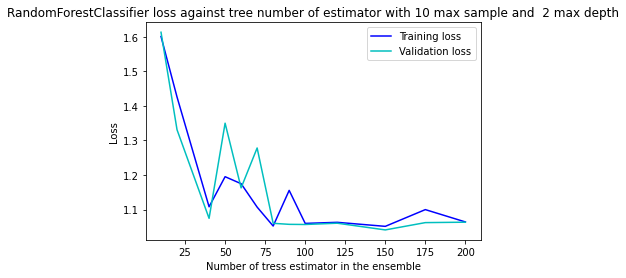

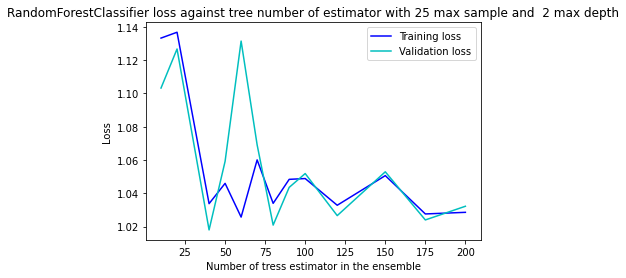

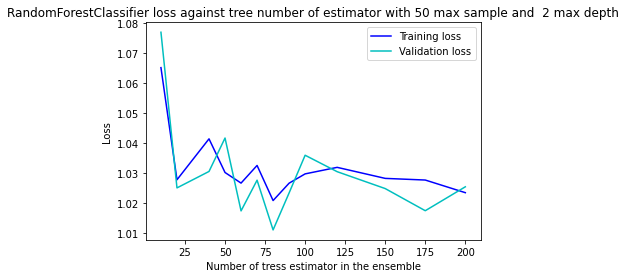

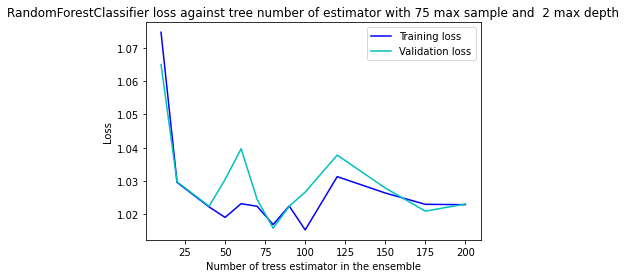

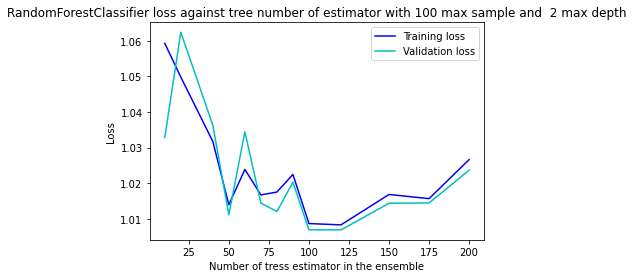

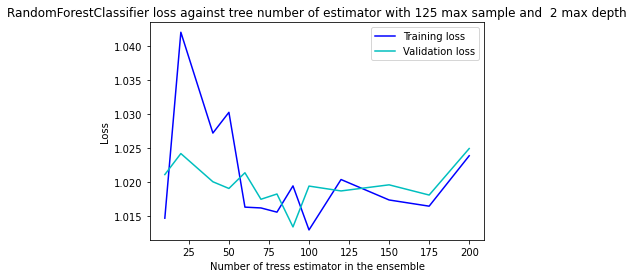

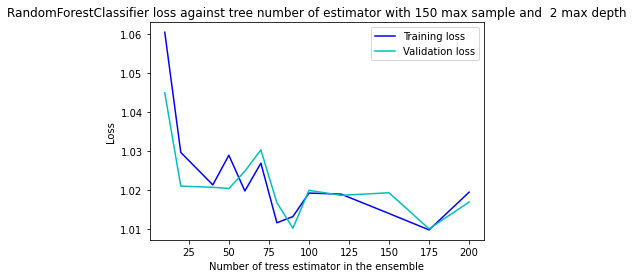

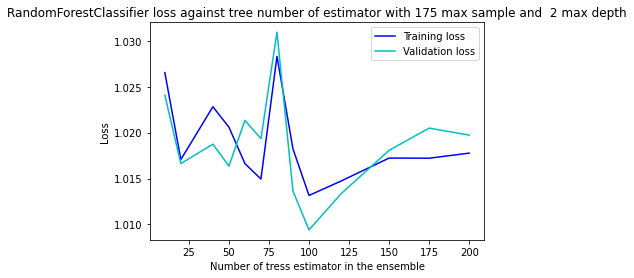

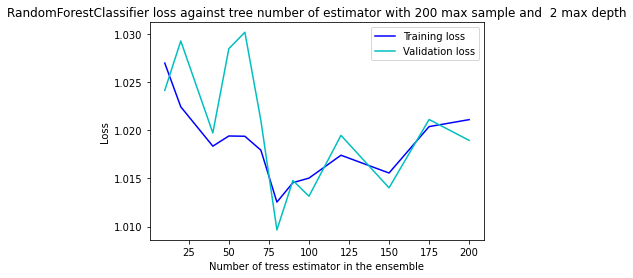

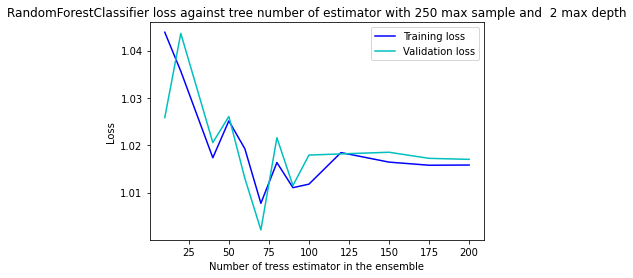

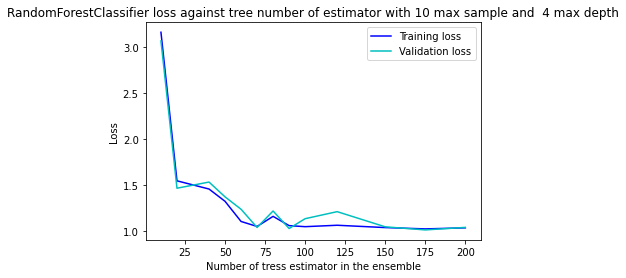

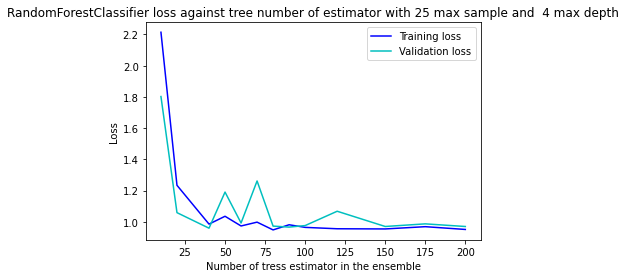

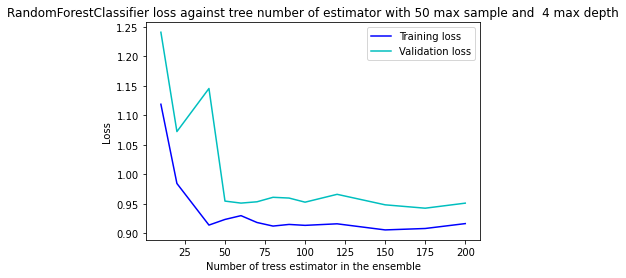

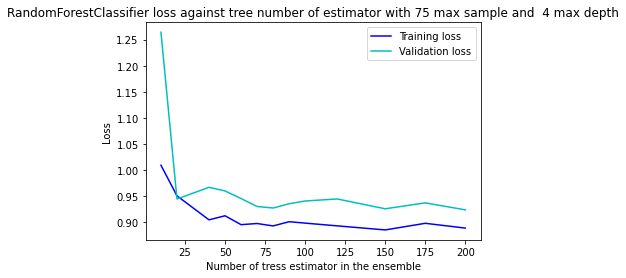

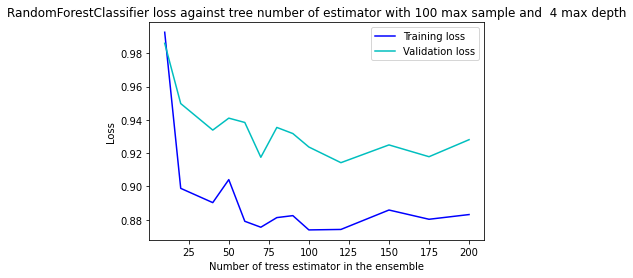

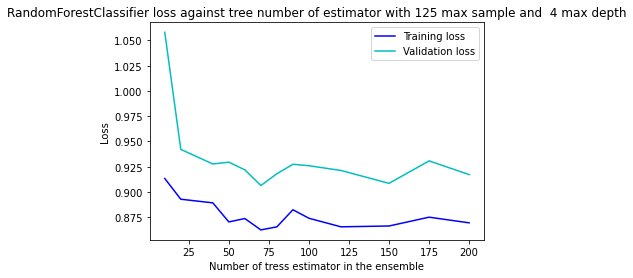

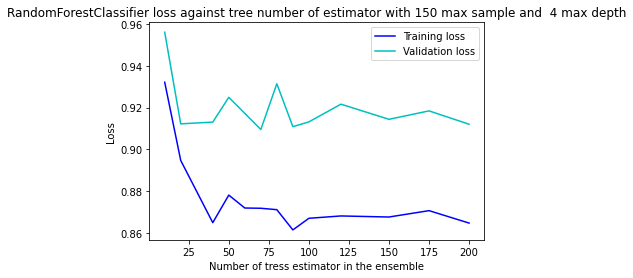

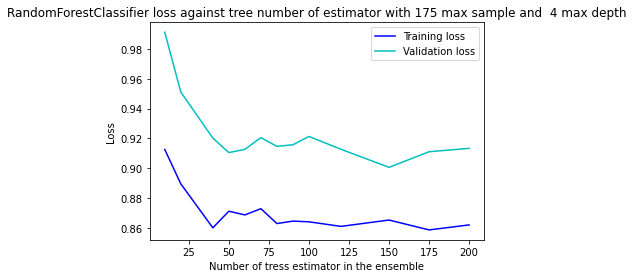

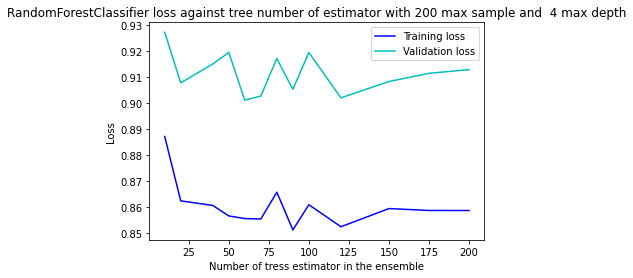

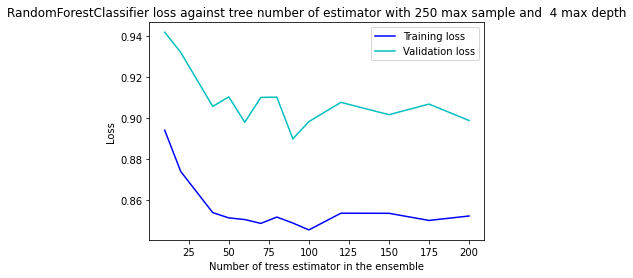

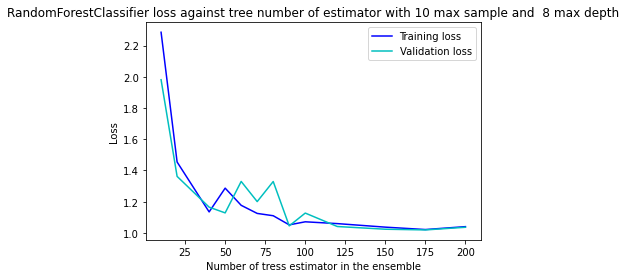

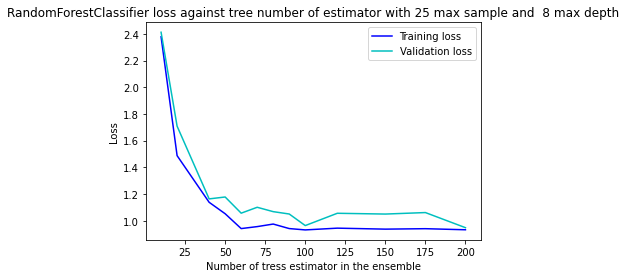

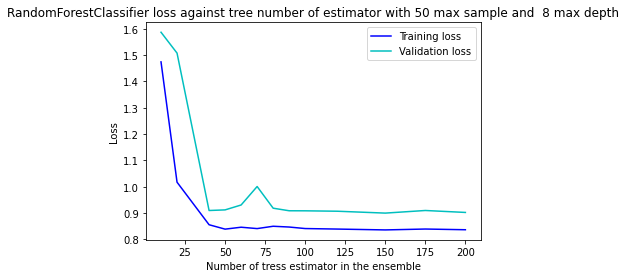

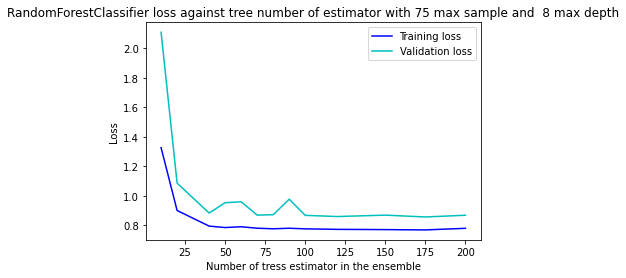

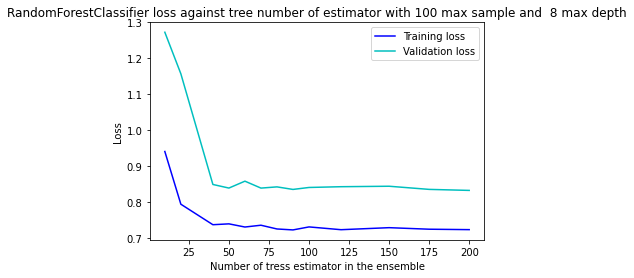

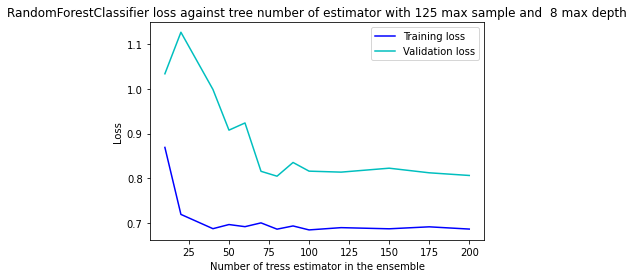

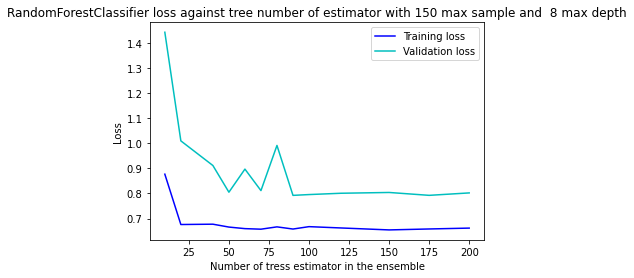

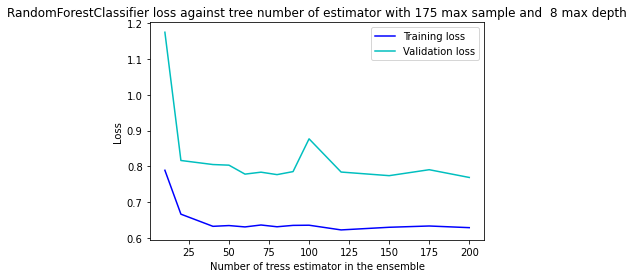

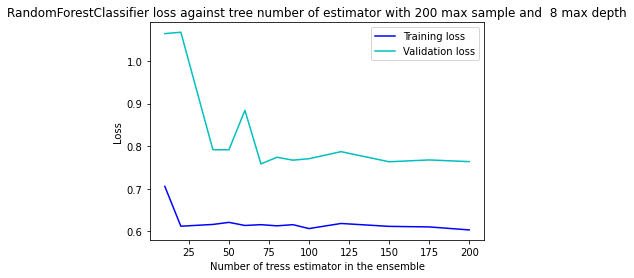

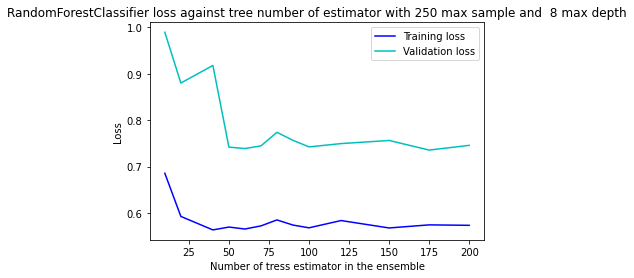

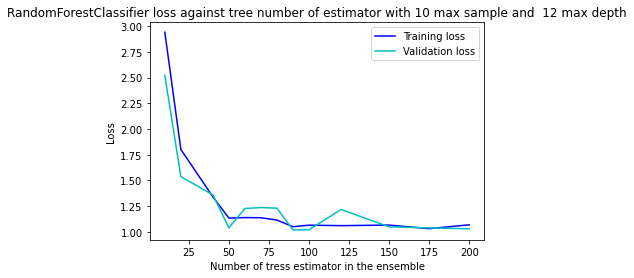

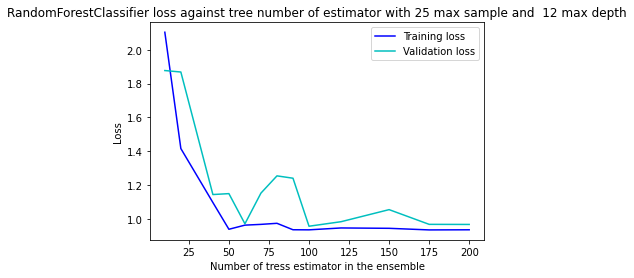

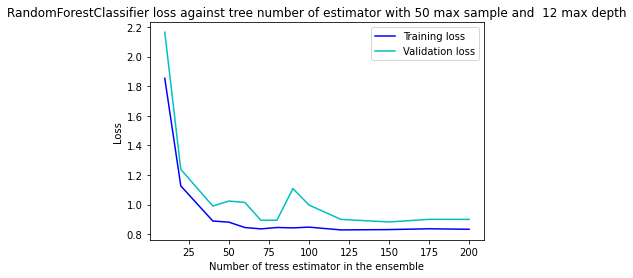

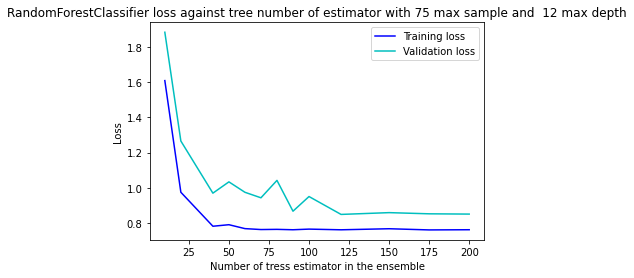

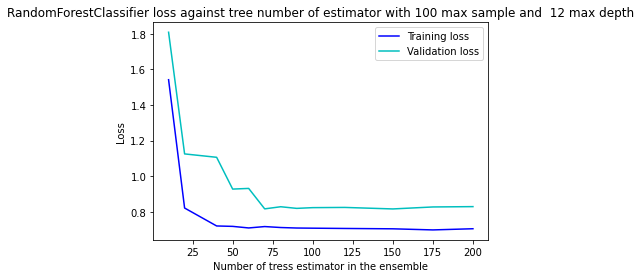

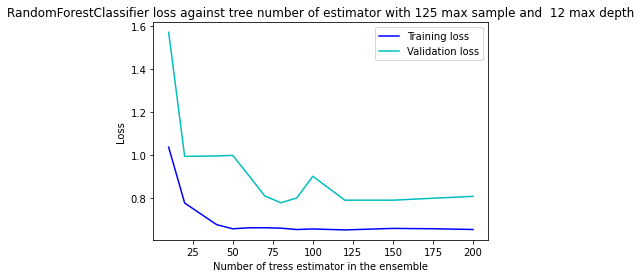

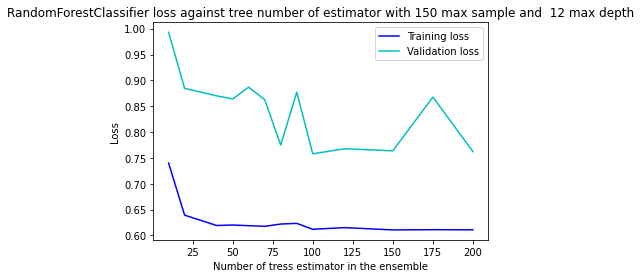

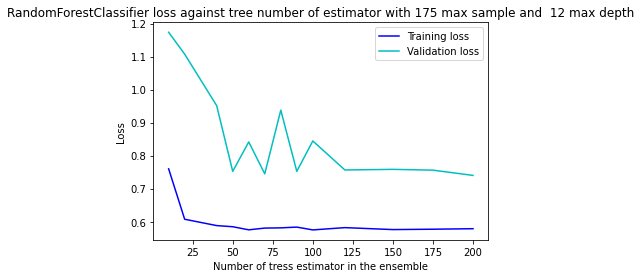

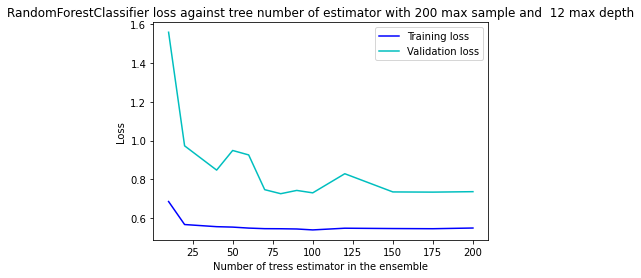

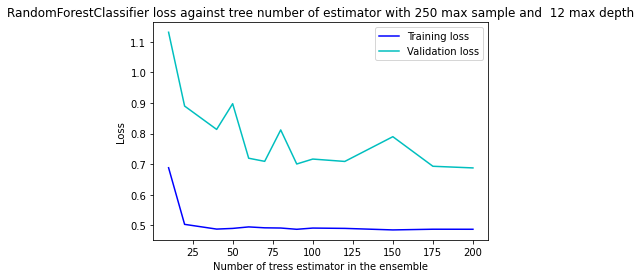

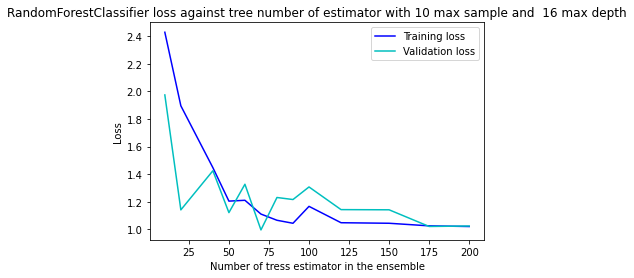

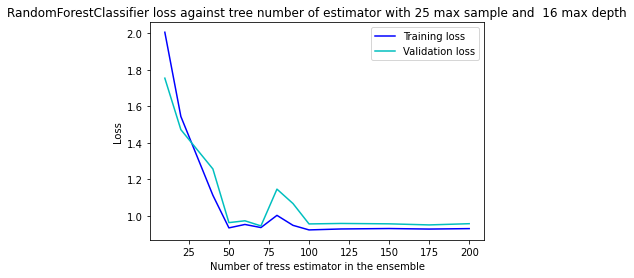

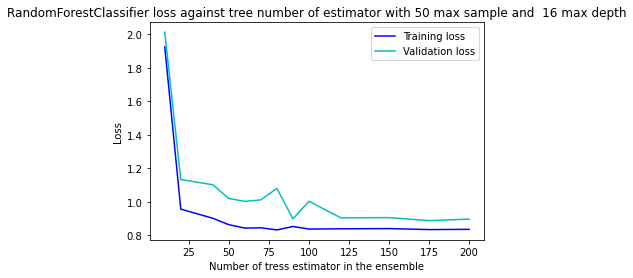

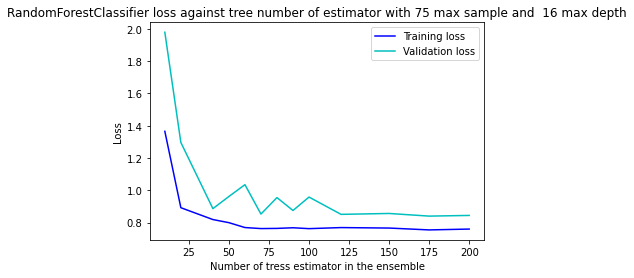

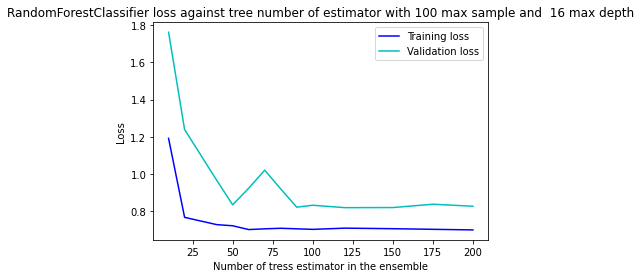

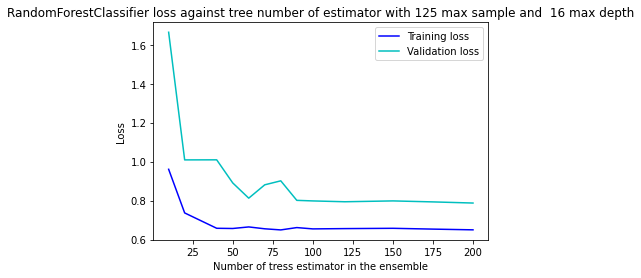

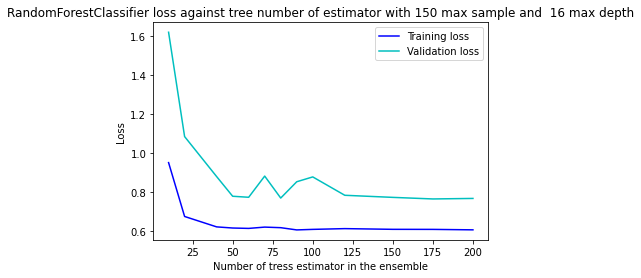

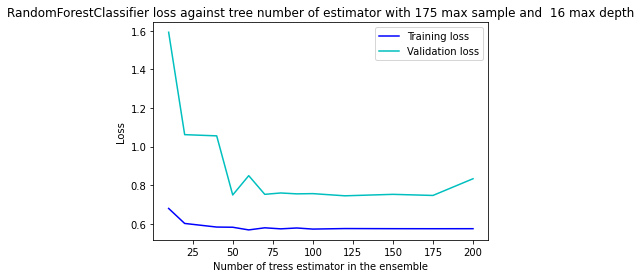

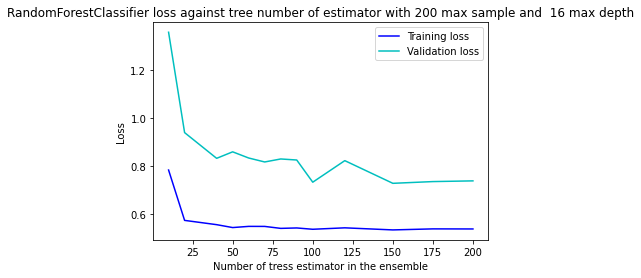

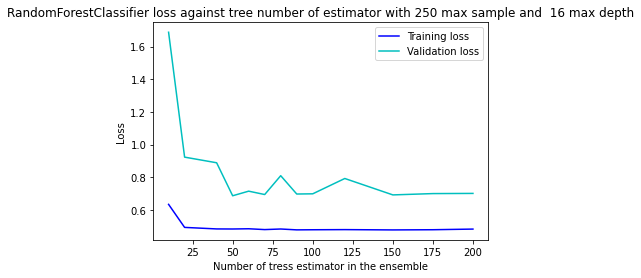

In [49]:
#training of the RandomForestClassifier

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_n_estimator = [10, 20, 40, 50, 60, 70, 80, 90, 100, 120, 150, 175, 200]
range_max_sample = [10, 25, 50, 75, 100, 125, 150, 175, 200, 250]
range_max_depth = [2, 4, 8, 12, 16]

for k in range_max_depth:

    for j in range_max_sample:
        train_loss =[]
        val_loss = []
        for i in range_n_estimator:
            classificationTree = RandomForestClassifier(n_estimators=i, max_depth=k, max_samples=j)

            classificationTree.fit(X_train, Y_train)
            #Z_train = classificationTree.predict(X_train)
            Z_train_loss = classificationTree.predict_proba(X_train)
            loss_train = log_loss(Y_train, Z_train_loss)
            train_loss.append(loss_train)

            #Z_val = classificationTree.predict(X_val)
            Z_val_loss = classificationTree.predict_proba(X_val)
            loss_val = log_loss(Y_val, Z_val_loss)
            val_loss.append(loss_val)

        title = 'RandomForestClassifier loss against tree number of estimator with ' + str(j) + " max sample and  " + str(k) + " max depth"
        
        plt.title(title)
        plt.plot(range_n_estimator, train_loss,   c='b', label='Training loss')
        plt.plot(range_n_estimator, val_loss,  c='c', label='Validation loss')
        plt.xlabel('Number of tress estimator in the ensemble')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()





In [50]:
# test the model model with the hyperparameters chosen from above experiment
classificationTree = RandomForestClassifier(n_estimators=75, max_depth=16, max_samples=175)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

Loss for the training dataset
0.5740636333703187
Accuracy for the training dataset
0.8529718456725756
Minimum Real value and after prediction
3.0
4.0
Maximum Real value and after prediction
8.0
8.0
Loss for the testing dataset
1.2215068781100136
Accuracy for the testing dataset
0.6169014084507042
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
8.0


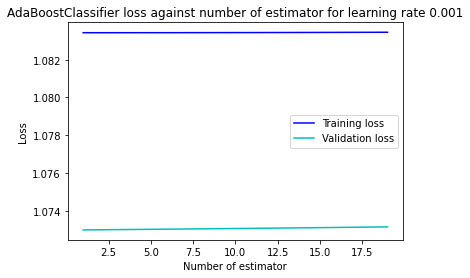

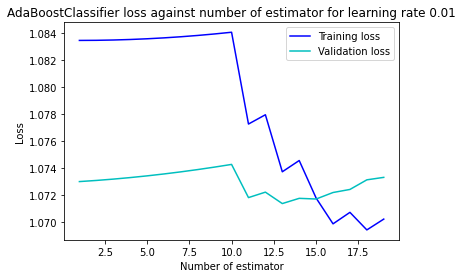

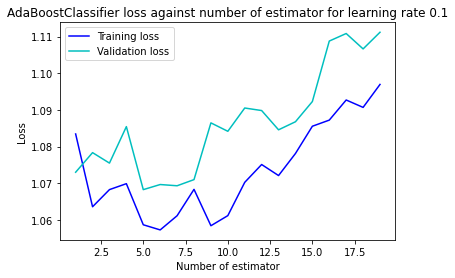

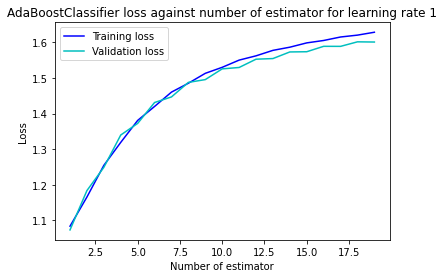

In [51]:
#training of the AdaBoostClassifier

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

#range_n_estimator = [10, 20, 40, 50, 60, 70, 80, 90, 100, 120, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
range_n_estimator = list(range(1, 20))
range_learning_rate = [0.001, 0.01, 0.1, 1]


for j in range_learning_rate:
    train_loss =[]
    val_loss = []

    for i in range_n_estimator:
        classificationTree = AdaBoostClassifier(n_estimators=i, learning_rate = j)
        
        classificationTree.fit(X_train, Y_train)
        #Z_train = classificationTree.predict(X_train)
        Z_train_loss = classificationTree.predict_proba(X_train)
        loss_train = log_loss(Y_train, Z_train_loss)
        train_loss.append(loss_train)

        #Z_val = classificationTree.predict(X_val)
        Z_val_loss = classificationTree.predict_proba(X_val)
        loss_val = log_loss(Y_val, Z_val_loss)
        val_loss.append(loss_val)

    title = 'AdaBoostClassifier loss against number of estimator for learning rate ' + str(j) 
    
    plt.title(title)
    plt.plot(range_n_estimator, train_loss,   c='b', label='Training loss')
    plt.plot(range_n_estimator, val_loss,  c='c', label='Validation loss')
    plt.xlabel('Number of estimator')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()





In [52]:
# test the model model with the hyperparameters chosen from the above experiment
classificationTree = AdaBoostClassifier(n_estimators=4, learning_rate = 0.1 )

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

Loss for the training dataset
1.0698585125575353
Accuracy for the training dataset
0.5505735140771637
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
6.0
Loss for the testing dataset
1.0606880540596821
Accuracy for the testing dataset
0.5521126760563381
Minimum Real value and after prediction
3.0
5.0
Maximum Real value and after prediction
8.0
6.0


In [53]:
#training of the SVM classifier

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

range_c=  [0.01, 0.1, 1, 10, 100, 1000]
## kernel='rbf'
train_loss =[]
val_loss = []
for i in range_c:
    classificationTree = SVC(kernel='linear', C=i, probability=True)

    classificationTree.fit(X_train, Y_train)
    #Z_train = classificationTree.predict(X_train)
    Z_train_loss = classificationTree.predict_proba(X_train)
    loss_train = log_loss(Y_train, Z_train_loss)
    train_loss.append(loss_train)

    #Z_val = classificationTree.predict(X_val)
    Z_val_loss = classificationTree.predict_proba(X_val)
    loss_val = log_loss(Y_val, Z_val_loss)
    val_loss.append(loss_val)
    print("Finished training with C equal to " + str(i))

title = 'SVM loss against C constant' 
 
plt.title(title)
plt.plot(range_c, train_loss,   c='b', label='Training loss')
plt.plot(range_c, val_loss,  c='c', label='Validation loss')
plt.xlabel('Constant C')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# test the model model with the hyperparameter  chosen from above experiment
classificationTree = sklearn.svm.SVC(kernel='linear', C=1, probability=True)

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))

Loss for the training dataset
0.9760032663933085
Accuracy for the training dataset
0.5912408759124088
Minimum Real value and after prediction
3.0
3.0
Maximum Real value and after prediction
8.0
8.0
Loss for the testing dataset
0.965693871502381
Accuracy for the testing dataset
0.5915492957746479
Minimum Real value and after prediction
3.0
3.0
Maximum Real value and after prediction
8.0
8.0


In [12]:
# Naive bayes based classifier 

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]


classificationTree = GaussianNB()

classificationTree.fit(X_train, Y_train)
Z_train = classificationTree.predict(X_train)
Z_train_loss = classificationTree.predict_proba(X_train)
loss_train = log_loss(Y_train, Z_train_loss)
accuracy_train = classificationTree.score(X_train, Y_train)
print("Loss for the training dataset")
print(loss_train)
print("Accuracy for the training dataset")
print(accuracy_train)
print("Minimum Real value and after prediction")
print(min(Y_train))
print(min(Z_train))
print("Maximum Real value and after prediction")
print(max(Y_train))
print(max(Z_train))

Z_test = classificationTree.predict(X_test)
Z_test_loss = classificationTree.predict_proba(X_test)
loss_test = log_loss(Y_test, Z_test_loss)
accuracy_test = classificationTree.score(X_test, Y_test)
print("Loss for the testing dataset")
print(loss_test)
print("Accuracy for the testing dataset")
print(accuracy_test)
print("Minimum Real value and after prediction")
print(min(Y_test))
print(min(Z_test))
print("Maximum Real value and after prediction")
print(max(Y_test))
print(max(Z_test))






Loss for the training dataset
1.2490259398268833
Accuracy for the training dataset
0.5338894681960376
Minimum Real value and after prediction
3.0
3.0
Maximum Real value and after prediction
8.0
8.0
Loss for the testing dataset
1.5249041708174862
Accuracy for the testing dataset
0.5521126760563381
Minimum Real value and after prediction
3.0
3.0
Maximum Real value and after prediction
8.0
8.0


In [16]:
#training the ensemble of the various model
# i did chose the best model found above to create the ensemble

train_data_div, val_data = train_test_split(train_data, test_size=0.25, shuffle=True)

X_train = train_data_div[:,:-1]
Y_train = train_data_div[:, 12]
X_val = val_data[:,:-1]
Y_val = val_data[:, 12]

X_test = test_data[:,:-1]
Y_test = test_data[:, 12]

list_of_models =[]
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=4)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=5)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=6)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=7)
list_of_models.append(classificationTree)
classificationTree = sklearn.tree.DecisionTreeClassifier(max_depth=8)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=75, max_depth=16, max_samples=175)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=125, max_depth=16, max_samples=200)
list_of_models.append(classificationTree)
classificationTree = RandomForestClassifier(n_estimators=100, max_depth=12, max_samples=250)
list_of_models.append(classificationTree)
classificationTree = AdaBoostClassifier(n_estimators=4, learning_rate = 0.1 )
list_of_models.append(classificationTree)


trained_models =[]
training_predictions = np.zeros((len(Y_train), len(list_of_models))) 

for class_idx, classificationTree in enumerate(list_of_models):

        trained_models.append(classificationTree.fit(X_train, Y_train))
        Z_train = classificationTree.predict(X_train)
        training_predictions[:, class_idx] = Z_train
        print(f'Training accuracy: {calc_accuracy(Z_train, Y_train)}')


final_training_prediction = stats.mode(training_predictions, axis=1)


training_accuracy = calc_accuracy(final_training_prediction, Y_train )

print(f'Ensemble Training accuracy: {training_accuracy}')

Training accuracy: 64.859228362878
Training accuracy: 68.30031282586027
Training accuracy: 71.94994786235662
Training accuracy: 78.20646506777894
Training accuracy: 82.79457768508863
Training accuracy: 85.50573514077163
Training accuracy: 88.21689259645464
Training accuracy: 91.24087591240875
Training accuracy: 55.05735140771637
Ensemble Training accuracy: 26.124330066620928


In [8]:
# testing the ensemble of various models

testing_predictions = np.zeros((len(Y_test), len(list_of_models)))
for class_idx, classificationTree in enumerate(trained_models):
          
    Z_test = classificationTree.predict(X_test)
    testing_predictions[:, class_idx] = Z_test
    print(f'testing accuracy: {calc_accuracy(Z_test, Y_test)}')



final_testing_prediction = stats.mode(testing_predictions, axis=1)


testing_accuracy = calc_accuracy(final_testing_prediction, Y_test )

print(f'Ensemble Testing accuracy: {testing_accuracy}')



testing accuracy: 59.29577464788732
testing accuracy: 56.61971830985916
testing accuracy: 57.04225352112676
testing accuracy: 57.32394366197183
testing accuracy: 56.33802816901409
testing accuracy: 62.25352112676056
testing accuracy: 62.95774647887325
testing accuracy: 65.91549295774648
testing accuracy: 55.21126760563381
Ensemble Testing accuracy: 25.85707200952192


In [25]:
# ensemble of differnt models with permutation to check the best prediction

permut = 4
permutations = list(itertools.permutations(trained_models, permut))
len(permutations)

ensemble_accuracy = []

for model_idx, trained_model in enumerate(permutations):
    training_predictions = np.zeros((len(Y_train), permut))
    for i in range(permut):
        Z_train = trained_model[i].predict(X_train)
        training_predictions[:, i] = Z_train 

    final_training_prediction = stats.mode(training_predictions, axis=1)
    training_accuracy = calc_accuracy(final_training_prediction, Y_train )
    ensemble_accuracy.append(training_accuracy)


max(ensemble_accuracy)
print(permutations[np.argmax(ensemble_accuracy)])

(DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=16, max_samples=175, n_estimators=75), AdaBoostClassifier(learning_rate=0.1, n_estimators=4))


In [ ]:
# one way to understand the which feature has most affect on the response variable (output) is to perform a test by taking out one feature per time and check the effect on the accuracy by traning the model, which ever feature has bigger effect on the accuracy is the most effective